In [1]:
 !pip install deap

You should consider upgrading via the 'C:\Users\smain\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import random

from deap import base, creator, tools

# Evaluation function
def eval_func(individual):
    target_sum = 45
    return len(individual) - abs(sum(individual) - target_sum),

# Create the toolbox with the right parameters
def create_toolbox(num_bits):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    # Initialize the toolbox
    toolbox = base.Toolbox()

    # Generate attributes 
    toolbox.register("attr_bool", random.randint, 0, 1)

    # Initialize structures
    toolbox.register("individual", tools.initRepeat, creator.Individual, 
        toolbox.attr_bool, num_bits)

    # Define the population to be a list of individuals
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    # Register the evaluation operator 
    toolbox.register("evaluate", eval_func)

    # Register the crossover operator
    toolbox.register("mate", tools.cxTwoPoint)

    # Register a mutation operator
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)

    # Operator for selecting individuals for breeding
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    return toolbox

if __name__ == "__main__":
    # Define the number of bits
    num_bits = 75

    # Create a toolbox using the above parameter
    toolbox = create_toolbox(num_bits)

    # Seed the random number generator
    random.seed(7)

    # Create an initial population of 500 individuals
    population = toolbox.population(n=500)

    # Define probabilities of crossing and mutating
    probab_crossing, probab_mutating  = 0.5, 0.2

    # Define the number of generations
    num_generations = 60
    
    print('\nStarting the evolution process')
    
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit
    
    print('\nEvaluated', len(population), 'individuals')
    
    # Iterate through generations
    for g in range(num_generations):
        print("\n===== Generation", g)
        
        # Select the next generation individuals
        offspring = toolbox.select(population, len(population))

        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))
    
        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            # Cross two individuals
            if random.random() < probab_crossing:
                toolbox.mate(child1, child2)

                # "Forget" the fitness values of the children
                del child1.fitness.values
                del child2.fitness.values

        # Apply mutation
        for mutant in offspring:
            # Mutate an individual
            if random.random() < probab_mutating:
                toolbox.mutate(mutant)
                del mutant.fitness.values
    
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        print('Evaluated', len(invalid_ind), 'individuals')
        
        # The population is entirely replaced by the offspring
        population[:] = offspring
        
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in population]
        
        length = len(population)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5
        
        print('Min =', min(fits), ', Max =', max(fits))
        print('Average =', round(mean, 2), ', Standard deviation =', 
                round(std, 2))
    
    print("\n==== End of evolution")
    
    best_ind = tools.selBest(population, 1)[0]
    print('\nBest individual:\n', best_ind)
    print('\nNumber of ones:', sum(best_ind))



Starting the evolution process

Evaluated 500 individuals

===== Generation 0
Evaluated 297 individuals
Min = 58.0 , Max = 75.0
Average = 70.43 , Standard deviation = 2.91

===== Generation 1
Evaluated 303 individuals
Min = 63.0 , Max = 75.0
Average = 72.44 , Standard deviation = 2.16

===== Generation 2
Evaluated 310 individuals
Min = 65.0 , Max = 75.0
Average = 73.31 , Standard deviation = 1.6

===== Generation 3
Evaluated 273 individuals
Min = 67.0 , Max = 75.0
Average = 73.76 , Standard deviation = 1.41

===== Generation 4
Evaluated 309 individuals
Min = 68.0 , Max = 75.0
Average = 73.87 , Standard deviation = 1.35

===== Generation 5
Evaluated 312 individuals
Min = 68.0 , Max = 75.0
Average = 73.83 , Standard deviation = 1.36

===== Generation 6
Evaluated 308 individuals
Min = 67.0 , Max = 75.0
Average = 73.76 , Standard deviation = 1.5

===== Generation 7
Evaluated 314 individuals
Min = 67.0 , Max = 75.0
Average = 73.85 , Standard deviation = 1.39

===== Generation 8
Evaluated 3

Le bloc de code précédentimplémente un algorithme génétique utilisant la bibliothèque DEAP pour optimiser une population d'individus représentés sous forme binaire.

L'objectif est de trouver une combinaison de bits dont la somme se rapproche de 45. Pour cela, une fonction d’évaluation mesure la différence entre la somme des bits de l'individu et la valeur cible.

L’algorithme commence par initialiser une population de 500 individus de 75 bits chacun. À chaque génération, il effectue une sélection des meilleurs individus en utilisant un tournoi. Ensuite, il applique des croisements et mutations avec des probabilités définies (50% pour le croisement et 20% pour la mutation).

Après chaque génération, les individus sont réévalués, et les statistiques sur la population sont affichées : valeur minimale, maximale, moyenne et écart-type des scores.

Après 60 générations, l'évolution s'arrête, et l'algorithme affiche le meilleur individu trouvé ainsi que le nombre de bits actifs (1) dans celui-ci.

Ce code est un exemple d’optimisation par algorithme génétique, illustrant comment l'évolution naturelle peut être simulée pour résoudre un problème numérique.

---

c:\Users\smain\AppData\Local\Programs\Python\Python310\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	evals	std   	min    	avg    	max    
0  	200  	188.36	217.082	576.281	1199.71
1  	200  	267.771	177.951	664.621	1886.26
2  	200  	278.323	241.077	697.146	1801.67
3  	200  	218.546	137.702	513.883	1307.41
4  	200  	131.992	140.886	374.041	739.372
5  	200  	84.5236	113.862	291.389	625.977
6  	200  	66.4526	126.375	243.34 	469.926
7  	200  	49.7153	82.8412	197.511	348.043
8  	200  	38.3504	73.0274	167.743	309.409
9  	200  	37.4221	76.7296	162.881	337.876
10 	200  	31.584 	90.0571	151.457	250.642
11 	200  	28.7502	60.9416	137.673	255.886
12 	200  	30.5608	58.3516	136.254	242.471
13 	200  	28.2293	61.0749	132.133	200.212
14 	200  	24.8966	73.6083	128.44 	201.353
15 	200  	24.0441	44.6969	121.76 	184.873
16 	200  	23.8312	66.5502	117.786	183.772
17 	200  	22.3703	49.7996	118.032	173.369
18 	200  	21.2466	50.2553	111.336	164.842
19 	200  	23.693 	29.7588	110.346	167.159
20 	200  	23.1049	37.4303	108.531	166.706
21 	200  	23.6721	52.7345	112.505	158.215
22 	200  	21.6273	46.0387	108.519	15

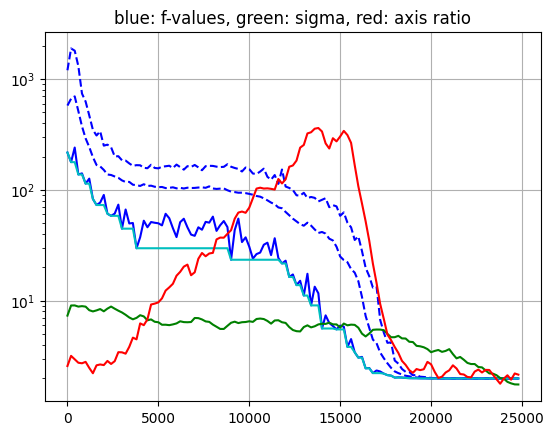

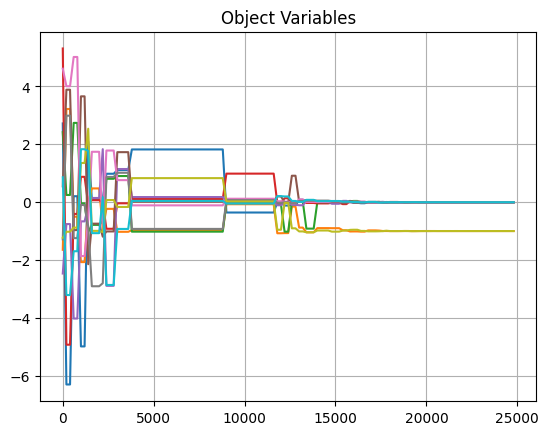

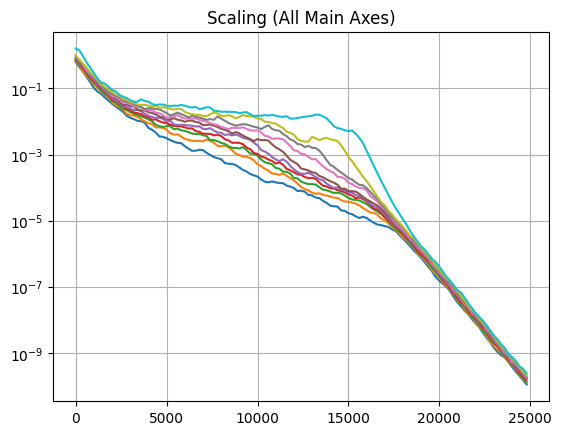

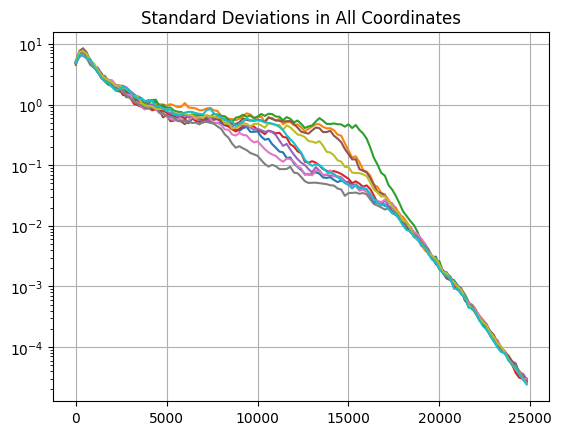

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from deap import algorithms, base, benchmarks, \
        cma, creator, tools

# Function to create a toolbox
def create_toolbox(strategy):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("evaluate", benchmarks.rastrigin)

    # Seeed the random number generator
    np.random.seed(7)

    toolbox.register("generate", strategy.generate, creator.Individual)
    toolbox.register("update", strategy.update)

    return toolbox

if __name__ == "__main__":
    # Problem size
    num_individuals = 10
    num_generations = 125

    # Create a strategy using CMA-ES algorithm
    strategy = cma.Strategy(centroid=[5.0]*num_individuals, sigma=5.0, 
            lambda_=20*num_individuals)

    # Create toolbox based on the above strategy
    toolbox = create_toolbox(strategy)

    # Create hall of fame object
    hall_of_fame = tools.HallOfFame(1)

    # Register the relevant stats
    stats = tools.Statistics(lambda x: x.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    logbook = tools.Logbook()
    logbook.header = "gen", "evals", "std", "min", "avg", "max"
    
    # Objects that will compile the data
    sigma = np.ndarray((num_generations, 1))
    axis_ratio = np.ndarray((num_generations, 1))
    diagD = np.ndarray((num_generations, num_individuals))
    fbest = np.ndarray((num_generations,1))
    best = np.ndarray((num_generations, num_individuals))
    std = np.ndarray((num_generations, num_individuals))

    for gen in range(num_generations):
        # Generate a new population
        population = toolbox.generate()

        # Evaluate the individuals
        fitnesses = toolbox.map(toolbox.evaluate, population)
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit
        
        # Update the strategy with the evaluated individuals
        toolbox.update(population)
        
        # Update the hall of fame and the statistics with the
        # currently evaluated population
        hall_of_fame.update(population)
        record = stats.compile(population)
        logbook.record(evals=len(population), gen=gen, **record)
        
        print(logbook.stream)
        
        # Save more data along the evolution 
        sigma[gen] = strategy.sigma
        axis_ratio[gen] = max(strategy.diagD)**2/min(strategy.diagD)**2
        diagD[gen, :num_individuals] = strategy.diagD**2
        fbest[gen] = hall_of_fame[0].fitness.values
        best[gen, :num_individuals] = hall_of_fame[0]
        std[gen, :num_individuals] = np.std(population, axis=0)

    # The x-axis will be the number of evaluations
    x = list(range(0, strategy.lambda_ * num_generations, strategy.lambda_))
    avg, max_, min_ = logbook.select("avg", "max", "min")
    plt.figure()
    plt.semilogy(x, avg, "--b")
    plt.semilogy(x, max_, "--b")
    plt.semilogy(x, min_, "-b")
    plt.semilogy(x, fbest, "-c")
    plt.semilogy(x, sigma, "-g")
    plt.semilogy(x, axis_ratio, "-r")
    plt.grid(True)
    plt.title("blue: f-values, green: sigma, red: axis ratio")

    plt.figure()
    plt.plot(x, best)
    plt.grid(True)
    plt.title("Object Variables")

    plt.figure()
    plt.semilogy(x, diagD)
    plt.grid(True)
    plt.title("Scaling (All Main Axes)")

    plt.figure()
    plt.semilogy(x, std)
    plt.grid(True)
    plt.title("Standard Deviations in All Coordinates")
    
    plt.show()



Le bloc de code précédent implémente un algorithme d'optimisation évolutif basé sur CMA-ES (Covariance Matrix Adaptation Evolution Strategy) pour minimiser la fonction de Rastrigin, une fonction de test utilisée en optimisation.

Il commence par définir une stratégie CMA-ES et une boîte à outils (toolbox) qui gère la génération et l'évaluation des individus. L'algorithme évolue sur 125 générations, chaque génération contenant 10 individus, et utilise un processus d'évaluation, sélection et mise à jour pour améliorer progressivement la solution.

Au fil des générations, différentes métriques sont enregistrées : meilleure solution, moyenne, écart-type, ainsi que des paramètres liés à CMA-ES, comme la matrice de covariance et les axes principaux.

Enfin, des graphiques sont générés pour visualiser l'évolution des variables clés, notamment :

L'évolution des valeurs de la fonction objective (fonction Rastrigin).
La meilleure solution trouvée.
Les axes de la matrice de covariance.
Les écarts-types des individus au fil du temps.
Ce programme est un exemple avancé d'optimisation évolutionnaire, démontrant comment une stratégie adaptative comme CMA-ES ajuste dynamiquement ses paramètres pour converger vers une solution optimale.

---

In [4]:
import operator
import math
import random

import numpy as np
from deap import algorithms, base, creator, tools, gp

# Define new functions
def division_operator(numerator, denominator):
    if denominator == 0:
        return 1

    return numerator / denominator 

# Define the evaluation function
def eval_func(individual, points):
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)

    # Evaluate the mean squared error
    mse = ((func(x) - (2 * x**3 - 3 * x**2 + 4 * x - 1))**2 for x in points)

    return math.fsum(mse) / len(points),

# Function to create the toolbox
def create_toolbox():
    pset = gp.PrimitiveSet("MAIN", 1)
    pset.addPrimitive(operator.add, 2)
    pset.addPrimitive(operator.sub, 2)
    pset.addPrimitive(operator.mul, 2)
    pset.addPrimitive(division_operator, 2)
    pset.addPrimitive(operator.neg, 1)
    pset.addPrimitive(math.cos, 1)
    pset.addPrimitive(math.sin, 1)

    pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))

    pset.renameArguments(ARG0='x')

    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()

    toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("compile", gp.compile, pset=pset)
    toolbox.register("evaluate", eval_func, points=[x/10. for x in range(-10,10)])
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

    toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
    toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

    return toolbox

if __name__ == "__main__":
    random.seed(7)

    toolbox = create_toolbox()

    population = toolbox.population(n=450)
    hall_of_fame = tools.HallOfFame(1)
    
    stats_fit = tools.Statistics(lambda x: x.fitness.values)
    stats_size = tools.Statistics(len)

    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    mstats.register("avg", np.mean)
    mstats.register("std", np.std)
    mstats.register("min", np.min)
    mstats.register("max", np.max)

    # Define parameters
    probab_crossover = 0.4
    probab_mutate = 0.2
    num_generations = 60

    population, log = algorithms.eaSimple(population, toolbox, 
            probab_crossover, probab_mutate, num_generations, 
            stats=mstats, halloffame=hall_of_fame, verbose=True)



c:\Users\smain\AppData\Local\Programs\Python\Python310\lib\site-packages\deap\gp.py:257: RuntimeWarning: Ephemeral rand101 function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.
  warnings.warn("Ephemeral {name} function cannot be "
c:\Users\smain\AppData\Local\Programs\Python\Python310\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


   	      	                    fitness                    	                      size                     
   	      	-----------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max    	min    	nevals	std    	avg    	gen	max	min	nevals	std    
0  	450   	18.6918	0  	47.1923	7.39087	450   	6.27543	3.73556	0  	7  	2  	450   	1.62449
1  	251   	15.4572	1  	41.3823	4.46965	251   	4.54993	3.80222	1  	12 	1  	251   	1.81316
2  	236   	13.2545	2  	37.7223	4.46965	236   	4.06145	3.96889	2  	12 	1  	236   	1.98861
3  	251   	12.2299	3  	60.828 	4.46965	251   	4.70055	4.19556	3  	12 	1  	251   	1.9971 
4  	235   	11.001 	4  	47.1923	4.46965	235   	4.48841	4.84222	4  	13 	1  	235   	2.17245
5  	229   	9.44483	5  	31.478 	4.46965	229   	3.8796 	5.56   	5  	19 	1  	229   	2.43168
6  	225   	8.35975	6  	22.0546	3.02133	225   	3.40547	6.38889	6  	15 	1  	225   	2.40875
7  	237   	7.99309	7  	31.1356	1.81133	237   	4.08463	7.14667	7  	16 	1  	

Le bloc de code précédent utilise la programmation génétique (GP) avec DEAP pour approximer une fonction mathématique. Il génère une population d'expressions mathématiques sous forme d'arbres, cherchant à se rapprocher de f(x) = 2x³ - 3x² + 4x - 1.

L’algorithme suit ces étapes :

Création d’individus avec des opérations de base (+, -, *, /, sin, cos).
Évaluation de la précision des expressions via l'erreur quadratique moyenne (MSE).
Évolution sur 60 générations en appliquant crossover (40%) et mutation (20%).
Sélection des meilleurs individus via un tournoi et stockage du meilleur modèle.
À la fin, il affiche les statistiques d’évolution et la meilleure équation trouvée.

---

In [9]:
import copy
import random
from functools import partial
import os
import numpy as np
from deap import algorithms, base, creator, tools, gp

class RobotController(object):
    def __init__(self, max_moves):
        self.max_moves = max_moves
        self.moves = 0
        self.consumed = 0
        self.routine = None
        self.direction = ["north", "east", "south", "west"]
        self.direction_row = [1, 0, -1, 0]
        self.direction_col = [0, 1, 0, -1]
    
    def _reset(self):
        self.row = self.row_start 
        self.col = self.col_start 
        self.direction = 1
        self.moves = 0  
        self.consumed = 0
        self.matrix_exc = copy.deepcopy(self.matrix)

    def _conditional(self, condition, out1, out2):
        out1() if condition() else out2()

    def turn_left(self): 
        if self.moves < self.max_moves:
            self.moves += 1
            self.direction = (self.direction - 1) % 4

    def turn_right(self):
        if self.moves < self.max_moves:
            self.moves += 1    
            self.direction = (self.direction + 1) % 4
        
    def move_forward(self):
        if self.moves < self.max_moves:
            self.moves += 1
            self.row = (self.row + self.direction_row[self.direction]) % self.matrix_row
            self.col = (self.col + self.direction_col[self.direction]) % self.matrix_col

            if self.matrix_exc[self.row][self.col] == "target":
                self.consumed += 1

            self.matrix_exc[self.row][self.col] = "passed"

    def sense_target(self):
        ahead_row = (self.row + self.direction_row[self.direction]) % self.matrix_row
        ahead_col = (self.col + self.direction_col[self.direction]) % self.matrix_col        
        return self.matrix_exc[ahead_row][ahead_col] == "target"
   
    def if_target_ahead(self, out1, out2):
        return partial(self._conditional, self.sense_target, out1, out2)
   
    def run(self, routine):
        self._reset()
        while self.moves < self.max_moves:
            routine()
    
    def traverse_map(self, matrix):
        self.matrix = list()
        for i, line in enumerate(matrix):
            self.matrix.append(list())

            for j, col in enumerate(line.strip()):  # Supprimer espaces inutiles
                if col == "#":
                    self.matrix[-1].append("target")
                elif col == ".":
                    self.matrix[-1].append("empty")
                elif col == "S":
                    self.matrix[-1].append("empty")
                    self.row_start = self.row = i
                    self.col_start = self.col = j
                    self.direction = 1

        self.matrix_row = len(self.matrix)
        self.matrix_col = len(self.matrix[0])
        self.matrix_exc = copy.deepcopy(self.matrix)

class Prog(object):
    def _progn(self, *args):
        for arg in args:
            arg()

    def prog2(self, out1, out2): 
        return partial(self._progn, out1, out2)

    def prog3(self, out1, out2, out3):     
        return partial(self._progn, out1, out2, out3)

def eval_func(individual):
    global robot, pset
    routine = gp.compile(individual, pset)
    robot.run(routine)
    return robot.consumed,

def create_toolbox():
    global robot, pset
    pset = gp.PrimitiveSet("MAIN", 0)
    pset.addPrimitive(robot.if_target_ahead, 2)
    pset.addPrimitive(Prog().prog2, 2)
    pset.addPrimitive(Prog().prog3, 3)
    pset.addTerminal(robot.move_forward)
    pset.addTerminal(robot.turn_left)
    pset.addTerminal(robot.turn_right)

    if not hasattr(creator, "FitnessMax"):
        creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    if not hasattr(creator, "Individual"):
        creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("expr_init", gp.genFull, pset=pset, min_=1, max_=2)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr_init)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", eval_func)
    toolbox.register("select", tools.selTournament, tournsize=7)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

    return toolbox

if __name__ == "__main__":
    global robot
    random.seed(7)
    max_moves = 750
    robot = RobotController(max_moves)
    toolbox = create_toolbox()

    # 📌 Spécifier le chemin absolu
    file_path = r"C:\Users\smain\Downloads\target_map.txt"

    # 📌 Vérification si le fichier existe
    if not os.path.exists(file_path):
        print(f"❌ ERREUR : Le fichier {file_path} est introuvable ! Vérifiez son emplacement.")
        exit(1)

    # 📌 Lecture du fichier et chargement de la carte
    with open(file_path, 'r') as f:
        map_data = f.readlines()
    robot.traverse_map(map_data)
    print("✅ Carte chargée avec succès")

    # 📌 Initialisation de la population et des statistiques
    population = toolbox.population(n=400)
    hall_of_fame = tools.HallOfFame(1)
    stats = tools.Statistics(lambda x: x.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # 📌 Exécution de l'algorithme évolutif
    print("✅ Début de l'évolution génétique")
    algorithms.eaSimple(population, toolbox, 0.4, 0.3, 50, stats, halloffame=hall_of_fame)



✅ Carte chargée avec succès
✅ Début de l'évolution génétique
gen	nevals	avg   	std    	min	max
0  	400   	1.4875	4.37491	0  	62 
1  	231   	4.285 	7.56993	0  	73 
2  	235   	10.8925	14.8493	0  	73 
3  	231   	21.72  	22.1239	0  	73 
4  	238   	29.9775	27.7861	0  	76 
5  	224   	37.6275	31.8698	0  	76 
6  	231   	42.845 	33.0541	0  	80 
7  	223   	43.55  	33.9369	0  	83 
8  	234   	44.0675	34.5201	0  	83 
9  	231   	49.2975	34.3065	0  	83 
10 	249   	47.075 	36.4106	0  	93 
11 	222   	52.7925	36.2826	0  	97 
12 	248   	51.0725	37.2598	0  	97 
13 	234   	54.01  	37.4614	0  	97 
14 	229   	59.615 	37.7894	0  	97 
15 	228   	63.3   	39.8205	0  	97 
16 	220   	64.605 	40.3962	0  	97 
17 	236   	62.545 	40.5607	0  	97 
18 	233   	67.99  	38.9033	0  	97 
19 	236   	66.4025	39.6574	0  	97 
20 	221   	69.785 	38.7117	0  	97 
21 	244   	65.705 	39.0957	0  	97 
22 	230   	70.32  	37.1206	0  	97 
23 	241   	67.3825	39.4028	0  	97 
24 	227   	69.265 	38.8828	0  	97 
25 	230   	68.9875	38.2422	0  	9

Le bloc de code précédent implémente un robot explorateur basé sur la programmation génétique (GP) avec DEAP. Il vise à optimiser le déplacement du robot pour consommer un maximum de cibles dans un environnement donné.

🔹 RobotController : Définit les mouvements du robot (tourner, avancer) et détecte les cibles.
🔹 Carte d’exploration : Chargée depuis un fichier texte (target_map.txt), elle contient des cibles #, des cases vides . et un point de départ S.
🔹 Programmation génétique :

Individus = arbres représentant une séquence d’actions du robot.
Évaluation = nombre de cibles consommées.
Sélection, mutation et croisement optimisent l’exploration.
🔹 Exécution :
Chargement de la carte.
Initialisation d’une population de 400 stratégies.
Exécution sur 50 générations pour trouver la meilleure solution. 